# Description: This program uses linear regression to predict the price of Facebook stock 30 days into the future

In [3]:
#This cell imports the packages that we need

import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [4]:
#This cell loads the historical price data of the Facebook stock from Yahoo Finance

df = pd.read_csv('/Users/FletcherHenson/Desktop/FB_30.csv')
df.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,194.550003,197.369995,193.809998,194.720001,194.720001,16371300
1,2019-11-05,195.369995,195.750000,193.600006,194.320007,194.320007,9942000
2,2019-11-06,194.029999,194.369995,191.350006,191.550003,191.550003,10973000
3,2019-11-07,191.910004,193.440002,189.470001,190.419998,190.419998,13473000
4,2019-11-08,190.000000,192.339996,189.699997,190.839996,190.839996,10760800
5,2019-11-11,189.929993,190.080002,188.539993,189.610001,189.610001,8631200
6,2019-11-12,190.000000,195.059998,189.740005,194.470001,194.470001,17615500


In [5]:
#This cell creates the X and Y data sets

dates = []
prices = []

In [6]:
#This cells gets the number of rows and columns

df.shape

(20, 7)

In [7]:
#This prints the last row of data which is what we will test

df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
19,2019-12-02,202.130005,202.179993,198.050003,199.699997,199.699997,11503400


In [8]:
#This gets all of the data except for the last row

df = df.head(len(df)-1)
print(df.shape)

(19, 7)


In [9]:
#This cell gets all the rows from the dates column and from the open column 

df_dates = df.loc[:,'Date']
df_open = df.loc[:,'Open'] 

In [10]:
#This cell creates the independent data sets for the X and Y variables

for date in df_dates:
  dates.append( [int(date.split('-')[2])] )
  
for open_price in df_open:
  prices.append(float(open_price))

print(dates)

[[4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [25], [26], [27], [29]]


In [11]:
#Function to make three different models using regression

def predict_prices(dates, prices, x):
  
  svr_lin = SVR(kernel='linear', C=1e3)                    #Creates 3 different models
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  svr_lin.fit(dates,prices)                           #Trains the models on dates and prices
  svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)
  
  plt.scatter(dates, prices, color = 'black', label='Data')                   #Plot the models on the graph to see which one fits best
  plt.plot(dates, svr_rbf.predict(dates), color = 'red', label='RBF model')
  plt.plot(dates, svr_lin.predict(dates), color = 'green', label='Linear model')
  plt.plot(dates, svr_poly.predict(dates), color = 'blue', label='Polynomial model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()
  
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]      #Returns all three model predictions

/Users/fletcherhenson/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


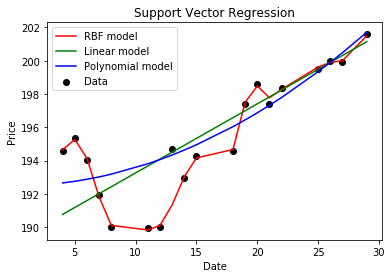

(203.97053609954733, 201.5610517895767, 202.35923586456812)


In [12]:
predicted_price = predict_prices(dates, prices, [[30]])         #Predicts the price of stock on day 30
print(predicted_price)

Analysis: Linear Regression was the best model to use for a project like this because the method analyizes and compares the relationship between two variables, in this case, the price of the stock and the predicted price of the stock. In predictive analytics it can be used to predict a future numerical value of a variable which is what we were trying to do for this specific project. 